# Most frequent words in various languages

First, we'll grab a font definition file that's powerful enough to render chinese, japanese, etc.

If you have your own, you can point to it here.

If you just want to use the default font file, just enter `font_filepath=None`

In [ ]:
font_filepath = None

In [ ]:
powerful_font_url = \
    'https://github.com/amueller/word_cloud/blob/master/examples/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

from graze import Graze  # pip install graze

g = Graze()
_ = g[powerful_font_url]  # load to make sure we have it (getting it if not)

dflt_font_filepath = g.filepath_of(powerful_font_url)

In [ ]:
import pandas as pd
import os
import requests
from io import BytesIO
from functools import cached_property, partial
from operator import attrgetter
from pathlib import PosixPath
from typing import Callable, Optional, Union
from i2 import Pipe
from guise import word_cloud
from graze import url_to_filepath as _url_to_filepath

url_to_filepath = partial(_url_to_filepath, download=None)

def asis(x):
    return x

relative_to_raw = lambda r: f"https://raw.githubusercontent.com/{r}"

root_url = 'https://raw.githubusercontent.com/thorwhalen/content/master/tables/csv/language_word_frequencies/'
lang_to_url = (root_url + '{lang}_word_frequencies_top_200.csv').format
lang_2_table = Pipe(lang_to_url, requests.get, attrgetter('content'), BytesIO, pd.read_csv)


specific_font_files = {
    'default': 'https://github.com/amueller/word_cloud/blob/master/examples/fonts/SourceHanSerif/SourceHanSerifK-Light.otf',
    'arabic': '/Library/Fonts/KFGQPC Uthmanic Script HAFS Regular.otf',
    'farsi': 'https://github.com/ooghry/TCPDF-Persian-Farsi-font/blob/master/HiwebNazanin.ttf?raw=true',
}

dflt_font_filepath = url_to_filepath(specific_font_files['default'])
dflt_word_cloud_kwargs = dict(prefer_horizontal=1.0)
dflt_image_save = os.path.expanduser('~/Downloads/')
assert os.path.isdir(dflt_image_save)

class WordsOfLang:
    def __init__(
        self, 
        lang: str='english',
        *,
        # language word count arguments
        lang_2_table: Callable=lang_2_table,
        word_column: str='word',
        count_column: str='count',
        word_count_transform: Optional[Callable]=None,
        # word cloud arguments
        dflt_font_filepath=dflt_font_filepath,
        specific_font_files = tuple(specific_font_files.items()),
        word_cloud_kwargs=tuple(dflt_word_cloud_kwargs.items()),
        image_save: Union[str, Callable] = dflt_image_save,
    ):
        if lang not in self.languages:
            raise ValueError(f"lang should be one of these:\n{self.languages}")
        self.lang = lang
        
        self.lang_2_table = lang_2_table
        self.word_column = word_column
        self.count_column = count_column
        self.word_count_transform = word_count_transform or asis

        self.dflt_font_filepath = dflt_font_filepath
        self.specific_font_files = dict(specific_font_files or {})
        self.word_cloud_kwargs = dict(word_cloud_kwargs or {})
        if isinstance(image_save, str):
            assert os.path.isdir(image_save), f"I didn't find this directory: {image_save}"
            image_save = PosixPath(image_save).write_bytes
        self.image_save = image_save
        
    
    @cached_property
    def word_counts(self):
        df = lang_2_table(lang=self.lang)
        return df.set_index(self.word_column)[self.count_column].to_dict()
    
    
    @cached_property
    def word_cloud(self):
        font_filepath = self.specific_font_files.get(self.lang, self.dflt_font_filepath)
        return word_cloud(self.word_counts, font_path=font_filepath, **self.word_cloud_kwargs)
    
    languages = (
        'albanian',
        'arabic',
        'azerbaijani',
        'basque',
        'bulgarian',
        'chinese',
        'croatian',
        'czech',
        'danish',
        'dutch',
        'english',
        'estonian',
        'farsi',
        'finnish',
        'french',
        'galician',
        'georgian',
        'german',
        'greek',
        'hebrew',
        'italian',
        'japanese',
        'kazakh',
        'korean',
        'latvian',
        'lithuanian',
        'macedonian',
        'marathi',
        'norwegian_bok',
        'norwegian_ny',
        'persian',
        'polish',
        'portuguese_br',
        'portuguese_eu',
        'russian',
        'serbian',
        'slovene',
        'spanish',
        'swedish',
        'turkish'
    )
    
    

In [ ]:
import pandas as pd
import requests
from io import BytesIO
from operator import attrgetter
from i2 import Pipe
from guise import word_cloud

relative_to_raw = lambda r: f"https://raw.githubusercontent.com/{r}"

root_url = 'https://raw.githubusercontent.com/thorwhalen/content/master/tables/csv/language_word_frequencies/'
lang_to_url = (root_url + '{lang}_word_frequencies_top_200.csv').format
lang_2_table = Pipe(lang_to_url, requests.get, attrgetter('content'), BytesIO, pd.read_csv)

def word_cloud_for_200_most_frequent_words(
    lang='english', font_filepath=dflt_font_filepath, prefer_horizontal=1.0, **kwargs
):
    if font_filepath is None:
        font_filepath = dflt_font_filepath
    df = lang_2_table(lang=lang)
    word_counts = df.set_index('word')['count'].to_dict()
    return word_cloud(word_counts, font_path=font_filepath, **kwargs)

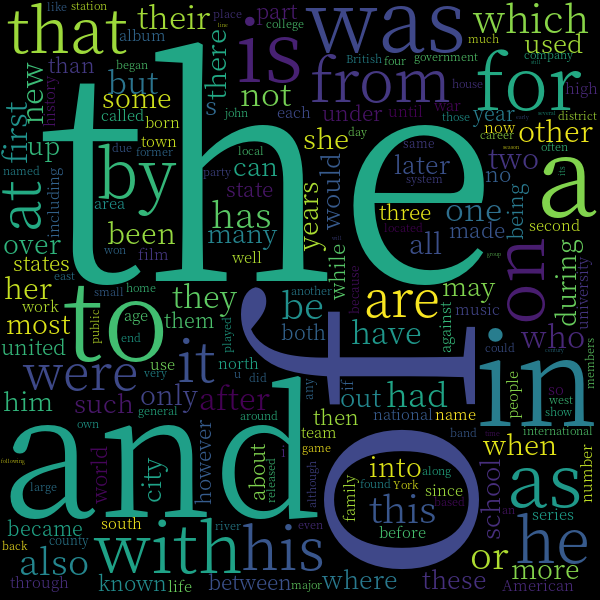

In [ ]:
word_cloud_for_200_most_frequent_words('english').to_image()

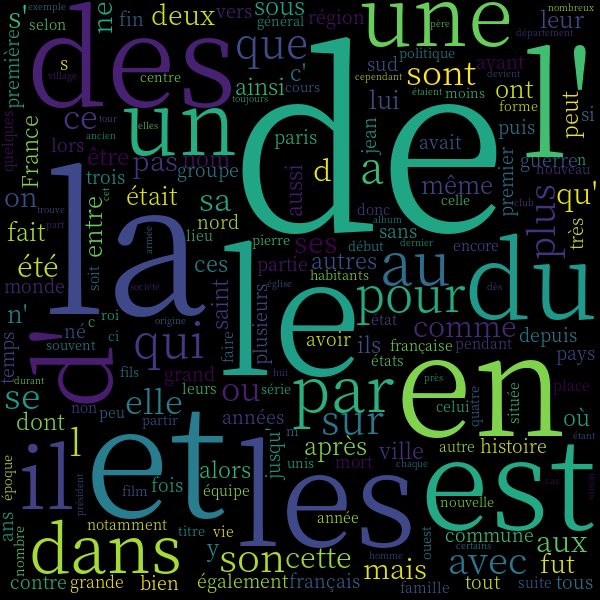

In [ ]:
word_cloud_for_200_most_frequent_words('french').to_image()

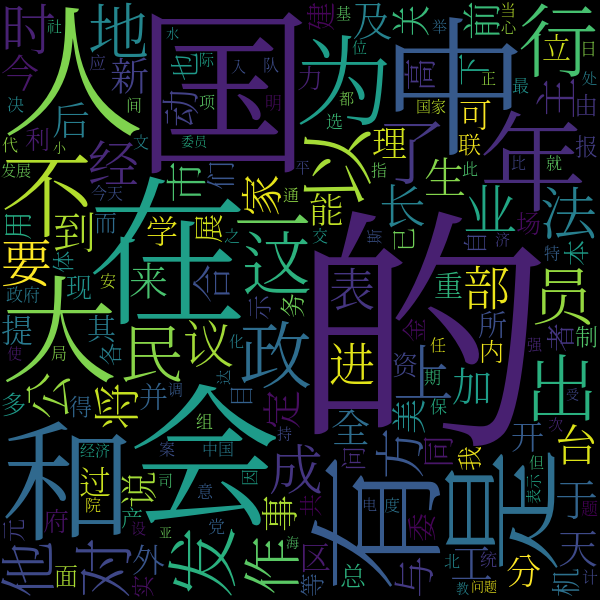

In [ ]:
word_cloud_for_200_most_frequent_words('chinese').to_image()

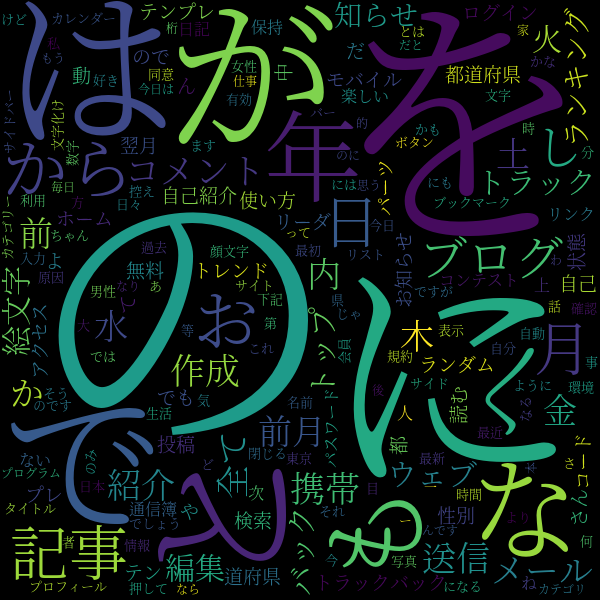

In [ ]:
word_cloud_for_200_most_frequent_words('japanese').to_image()

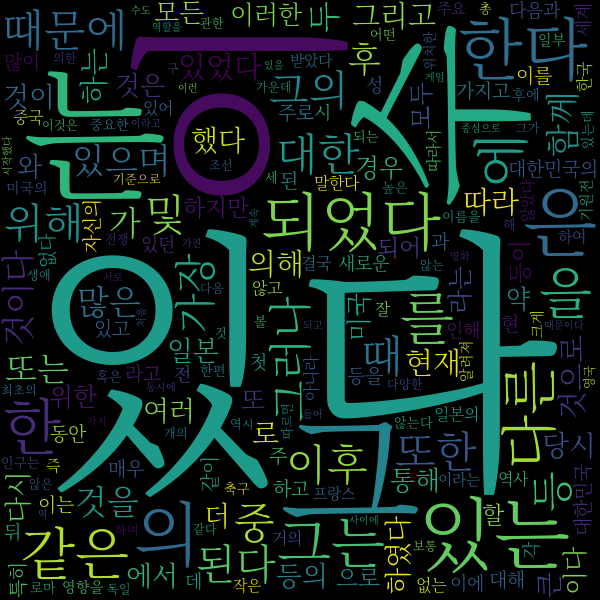

In [ ]:
word_cloud_for_200_most_frequent_words('korean').to_image()

In [ ]:
save_dir = '~/Downloads/'


languages = [
    'albanian',
    'arabic',
    'azerbaijani',
    'basque',
    'bulgarian',
    'chinese',
    'croatian',
    'czech',
    'danish',
    'dutch',
    'english',
    'estonian',
    'farsi',
    'finnish',
    'french',
    'galician',
    'georgian',
    'german',
    'greek',
    'hebrew',
    'italian',
    'japanese',
    'kazakh',
    'korean',
    'latvian',
    'lithuanian',
    'macedonian',
    'marathi',
    'norwegian_bok',
    'norwegian_ny',
    'persian',
    'polish',
    'portuguese_br',
    'portuguese_eu',
    'russian',
    'serbian',
    'slovene',
    'spanish',
    'swedish',
    'turkish'
]

specific_font_files = {
    'default': 'https://github.com/amueller/word_cloud/blob/master/examples/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'
    'arabic': '/Library/Fonts/KFGQPC Uthmanic Script HAFS Regular.otf',
    'farsi': 'https://github.com/ooghry/TCPDF-Persian-Farsi-font/blob/master/HiwebNazanin.ttf?raw=true'
}
save_dir = os.path.abspath(os.path.expanduser(save_dir))

languages = ['arabic']
for lang in languages:
    save_filepath = os.path.join(save_dir, f'{lang}.bmp')
    if not os.path.isfile(save_filepath):
        font_filepath = specific_font_files.get(lang)
        wc = word_cloud_for_200_most_frequent_words(lang, font_filepath=font_filepath)
        wc.to_file(save_filepath)

In [ ]:

default_font_url = 'https://github.com/amueller/word_cloud/blob/master/examples/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

specific_font_files = {
    'arabic': 'https://github.com/wp-plugins/arabic-font/raw/master/css/fonts/amiri-quran.ttf',
    'farsi': 'https://github.com/ooghry/TCPDF-Persian-Farsi-font/blob/master/HiwebNazanin.ttf?raw=true'
}

from graze import url_to_filepath as _url_to_filepath

url_to_filepath = __import__('functools').partial(_url_to_filepath, download=None)
    

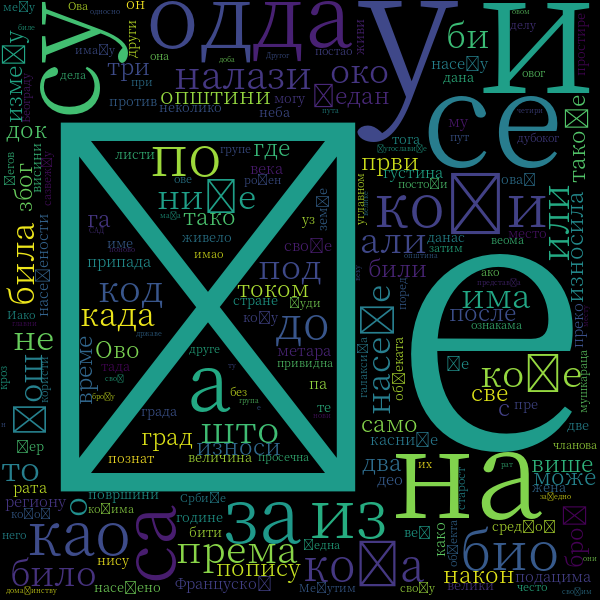

In [ ]:
lang = 'serbian'
word_cloud_for_200_most_frequent_words(
    lang, font_filepath=url_to_filepath(specific_font_files.get(lang, default_font_url))
).to_image()

In [ ]:
'https://github.com/amueller/word_cloud/blob/master/examples/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

,word,count,length,per_million,rank
0,في,1927655,2,39076.907184,1
1,من,1412687,2,28637.613462,2
2,على,669372,3,13569.330360,3
3,إلى,505070,3,10238.644110,4
4,أن,332418,2,6738.688890,5
...,...,...,...,...,...
195,سنوات,19052,5,386.217054,196
196,معظم,18937,4,383.885805,197
197,وكذلك,18837,5,381.858632,198
198,مركز,18679,4,378.655698,199
